# “KLASIFIKASI NUTRITION-SCORE PADA MINUMAN BERDASARKAN KANDUNGAN GIZI”

##  Team-Based Project Mata Kuliah Data Mining 1 Kelas SD-A1


# Introduction👋

### Kelompok I (9):
*   Brahmantya Fikri Setya Putra / 164221034
*   Cindashany Prijantika / 164221057
*   Andreas Hendra Herwanto / 164221064
*   Mochamad Naufal Izah R. / 164221097
*   Amira Naila Zahira / 164221100
---

**Dataset**

Link Dataset : https://drive.google.com/uc?id=1PKa6HySLJDNLBWi0zz-UAKsimaEUuj_E

# Read Data📖

In [ ]:
import gdown

file_id = '1PKa6HySLJDNLBWi0zz-UAKsimaEUuj_E'
output_file = '/content/beverages_nutrition_score.csv'
url = f'https://drive.google.com/uc?id={file_id}'
gdown.download(url, output_file, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1PKa6HySLJDNLBWi0zz-UAKsimaEUuj_E
To: /content/beverages_nutrition_score.csv
100%|██████████| 48.7k/48.7k [00:00<00:00, 52.7MB/s]


'/content/beverages_nutrition_score.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(output_file)
df.head()

,Nama_minuman,Nutri_Score,Energy (Per 100 ml),Fat (Per 100 ml),Saturated fat (Per 100 ml),Carbohydrates (Per 100 ml),Sugars (Per 100 ml),Fiber (Per 100 ml),Proteins (Per 100 ml),Salt (Per 100 ml),"Fruits, vegetables and legumes (Per 100 ml in %)"
0,Ice tea - Lipton - 1750 ml,Nutri-Score D,56 kj (13 kcal),0 g,0 g,3.1 g,3 g,?,0 g,0.03 g,0%
1,FuzeTea Thé noir évasion pêche & saveur hibisc...,Nutri-Score D,79 kj (19 kcal),0 g,0 g,4.3 g,4.3 g,0 g,0 g,0.03 g,5%
2,Cola Cao El Original - 383 g,Nutri-Score D,288 kj (68 kcal),1.7 g,1.1 g,9.6 g,9.1 g,0.5 g,3.4 g,0.12 g,?
3,Banania Original - Cocoa Cereals With Hint Of ...,Nutri-Score D,"1,577 kj (373 kcal)",2.2 g,1.4 g,79 g,69 g,6.7 g,5.6 g,0.06 g,0%
4,Oatly drink whole fridge version - 1ltr,Nutri-Score D,239 kj (57 kcal),2.8 g,0.3 g,6.6 g,4.1 g,0.8 g,1 g,0.1 g,25%


# Information of Dataset  ℹ

In [ ]:
df = df.drop('Nama_minuman',axis=True)
df.shape

(449, 10)

In [ ]:
df.columns

Index(['Nutri_Score', 'Energy (Per 100 ml)', 'Fat (Per 100 ml)',
       'Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
       'Sugars (Per 100 ml)', 'Fiber (Per 100 ml)', 'Proteins (Per 100 ml)',
       'Salt (Per 100 ml)',
       'Fruits, vegetables and legumes (Per 100 ml in %)'],
      dtype='object')

# Data Preprocessing 🔄

## Cleaning Data

In [ ]:
df['Nutri_Score'] = df['Nutri_Score'].str.replace('Nutri-Score','').str.replace(' ','')
df['Energy (Per 100 ml)'] = df['Energy (Per 100 ml)'].str.split(' ').str[0].str.replace(',','').str.replace(' ','')

In [ ]:
import re

def find_symbols(value):
    symbols = re.findall(r'[^0-9\.\s]', str(value))
    return symbols

results = []
for column in df.columns:
    found_symbols = set()
    for value in df[column]:
        symbols = find_symbols(value)
        if symbols:
            found_symbols.update(symbols)

    results.append({'Nama_Kolom': column,
                    'Symbols_Detected': ', '.join(sorted(found_symbols))})

df_cek_symbols = pd.DataFrame(results)
df_cek_symbols

,Nama_Kolom,Symbols_Detected
0,Nutri_Score,"A, B, C, D, E"
1,Energy (Per 100 ml),
2,Fat (Per 100 ml),"<, g"
3,Saturated fat (Per 100 ml),"<, ?, g"
4,Carbohydrates (Per 100 ml),"<, g"
5,Sugars (Per 100 ml),"<, ?, g"
6,Fiber (Per 100 ml),"-, <, ?, g"
7,Proteins (Per 100 ml),"<, g"
8,Salt (Per 100 ml),"<, ?, g"
9,"Fruits, vegetables and legumes (Per 100 ml in %)","%, ?, a, n"


In [ ]:
for i in df.columns:
    df[i]=df[i].str.replace('g','').str.replace('<','').str.replace('?','0').str.replace('-','0').str.replace(' ', '')

In [ ]:
df['Fruits, vegetables and legumes (Per 100 ml in %)'] = df['Fruits, vegetables and legumes (Per 100 ml in %)'].str.replace('%','').astype(float)/100

In [ ]:
# convert data types
for i in df.columns[1:9]:
    df[i]=df[i].astype(float)

## Missing Value

In [ ]:
misval_cek = {
    'Missing Values':df.isnull().sum(),
    'Missing Values (%)': ((df.isnull().sum()/df.shape[0]).round(2)*100),
    'Data Type': df.dtypes
    }

misval=pd.DataFrame(misval_cek)
misval

,Missing Values,Missing Values (%),Data Type
Nutri_Score,0,0.0,object
Energy (Per 100 ml),0,0.0,float64
Fat (Per 100 ml),0,0.0,float64
Saturated fat (Per 100 ml),0,0.0,float64
Carbohydrates (Per 100 ml),0,0.0,float64
Sugars (Per 100 ml),0,0.0,float64
Fiber (Per 100 ml),0,0.0,float64
Proteins (Per 100 ml),0,0.0,float64
Salt (Per 100 ml),0,0.0,float64
"Fruits, vegetables and legumes (Per 100 ml in %)",7,2.0,float64


In [ ]:
# Imputasi 0
df['Fruits, vegetables and legumes (Per 100 ml in %)'] = df['Fruits, vegetables and legumes (Per 100 ml in %)'].fillna(0)

In [ ]:
df1=df.copy()

##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Nutri_Score'] = le.fit_transform(df['Nutri_Score'])

for label, class_ in enumerate(le.classes_):
    print(f"Class {label}: {class_}")

Class 0: A
Class 1: B
Class 2: C
Class 3: D
Class 4: E


In [ ]:
df2=df.copy()

## Outlier

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

def plot_box(df):
    columns_to_plot = ['Energy (Per 100 ml)', 'Fat (Per 100 ml)','Saturated fat (Per 100 ml)', 'Carbohydrates (Per 100 ml)',
                       'Sugars (Per 100 ml)', 'Fiber (Per 100 ml)', 'Proteins (Per 100 ml)','Salt (Per 100 ml)',
                       'Fruits, vegetables and legumes (Per 100 ml in %)']

    n_rows = 3 # Number of rows
    n_cols = 3 # Number of columns

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))

    if n_rows == 1:
        axes = axes.reshape(1, -1)
    if n_cols == 1:
        axes = axes.reshape(-1, 1)

    for i, column in enumerate(columns_to_plot):
        row_idx = i // n_cols
        col_idx = i % n_cols
        ax = axes[row_idx, col_idx]
        boxplot = df.boxplot(column=[column], ax=ax)
        ax.set_title(column)

    # Remove any empty subplots
    for i in range(len(columns_to_plot), n_rows * n_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

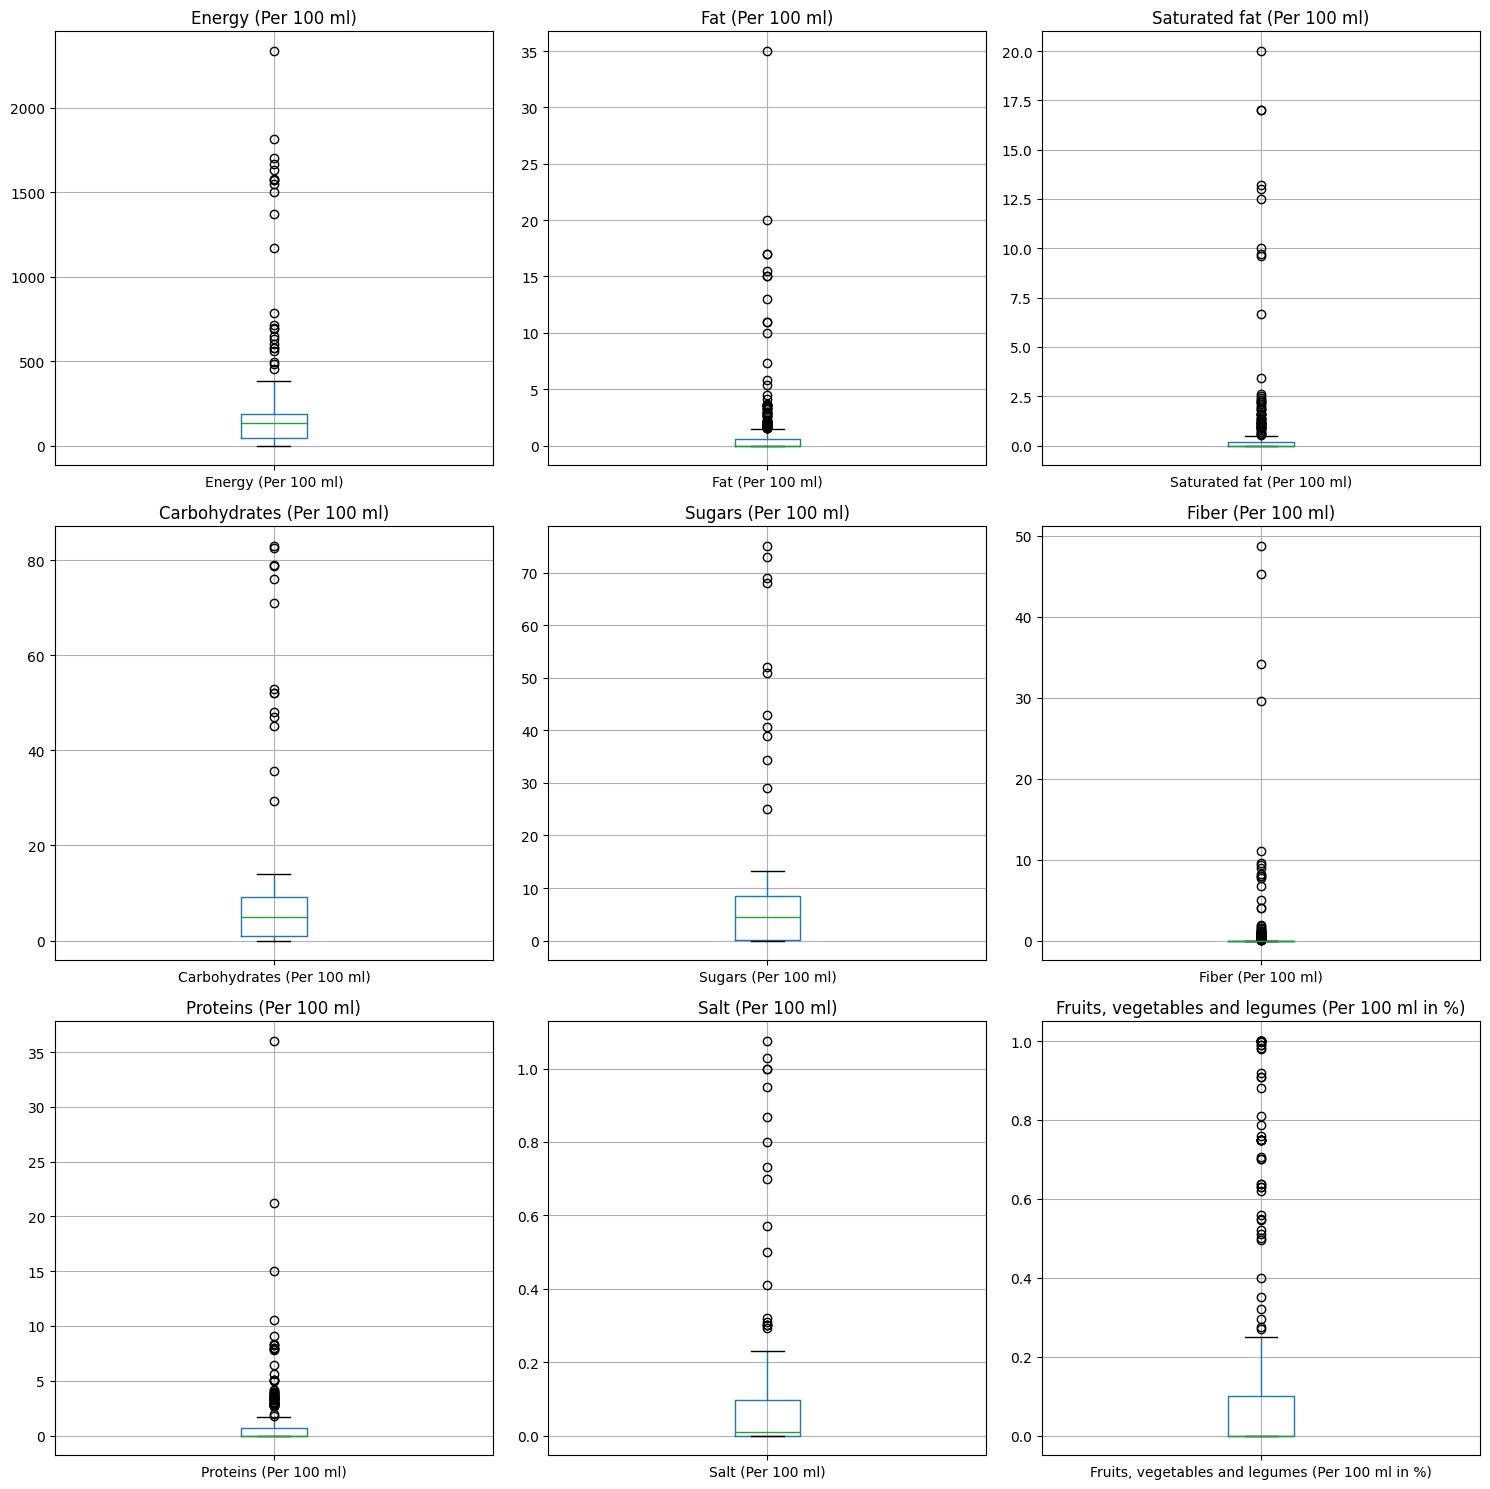

In [ ]:
plot_box(df)

In [ ]:
# handling outlier
df[df.columns[1]] = df[df.columns[1]].where(df[df.columns[1]] >= 1000, pd.NA)
df[df.columns[2]] = df[df.columns[2]].where(df[df.columns[2]] >= 10, pd.NA)
df[df.columns[3]] = df[df.columns[3]].where(df[df.columns[3]] >= 7.5, pd.NA)
df[df.columns[4]] = df[df.columns[4]].where(df[df.columns[4]] >= 20, pd.NA)
df[df.columns[5]] = df[df.columns[5]].where(df[df.columns[5]] >= 20, pd.NA)
df[df.columns[6]] = df[df.columns[6]].where(df[df.columns[6]] >= 15, pd.NA)
df[df.columns[7]] = df[df.columns[7]].where(df[df.columns[7]] >= 10, pd.NA)
df[df.columns[8]] = df[df.columns[8]].where(df[df.columns[8]] >= 0.6, pd.NA)
df[df.columns[9]] = df[df.columns[9]].where(df[df.columns[9]] >= 0.6, pd.NA)

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
imp = IterativeImputer(estimator=regressor, missing_values=np.nan, max_iter=5, verbose=2, imputation_order='roman')
df = pd.DataFrame(imp.fit_transform(df), columns=df.columns)

[IterativeImputer] Completing matrix with shape (449, 10)
[IterativeImputer] Ending imputation round 1/5, elapsed time 0.04
[IterativeImputer] Change: 798.062867944679, scaled tolerance: 2.337 
[IterativeImputer] Ending imputation round 2/5, elapsed time 0.06
[IterativeImputer] Change: 35.134001780435945, scaled tolerance: 2.337 
[IterativeImputer] Ending imputation round 3/5, elapsed time 0.07
[IterativeImputer] Change: 5.5067203147009565, scaled tolerance: 2.337 
[IterativeImputer] Ending imputation round 4/5, elapsed time 0.09
[IterativeImputer] Change: 4.701134137388422, scaled tolerance: 2.337 
[IterativeImputer] Ending imputation round 5/5, elapsed time 0.10
[IterativeImputer] Change: 3.585980877069005, scaled tolerance: 2.337 


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


##Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[df.columns[1:10]])
scaled_df = pd.DataFrame(scaled, columns =  df.columns[1:10])
df = pd.concat([df.drop(columns = df.columns[1:10]),scaled_df], axis=1)

# Exploratory Data Analysis (EDA) 📊


## Corr Heatmap

In [ ]:
df_eda = df2.copy()
df_eda.rename(columns={'Energy (Per 100 ml)': 'Energy',
                       'Fat (Per 100 ml)': 'Fat',
                       'Saturated fat (Per 100 ml)': 'Saturated Fat',
                       'Carbohydrates (Per 100 ml)': 'Carbohydrates',
                       'Sugars (Per 100 ml)': 'Sugars',
                       'Fiber (Per 100 ml)': 'Fiber',
                       'Proteins (Per 100 ml)': 'Proteins',
                       'Salt (Per 100 ml)': 'Salt',
                       'Fruits, vegetables and legumes (Per 100 ml in %)': 'Fruits,Veggies,\nLegumes'}, inplace=True)

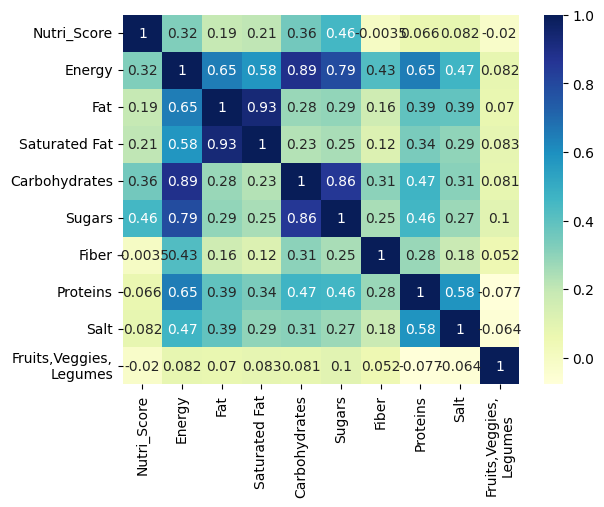

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sns

heatmap_corr= sns.heatmap(df_eda.corr(), cmap="YlGnBu", annot=True)
mp.show()


## Barplot

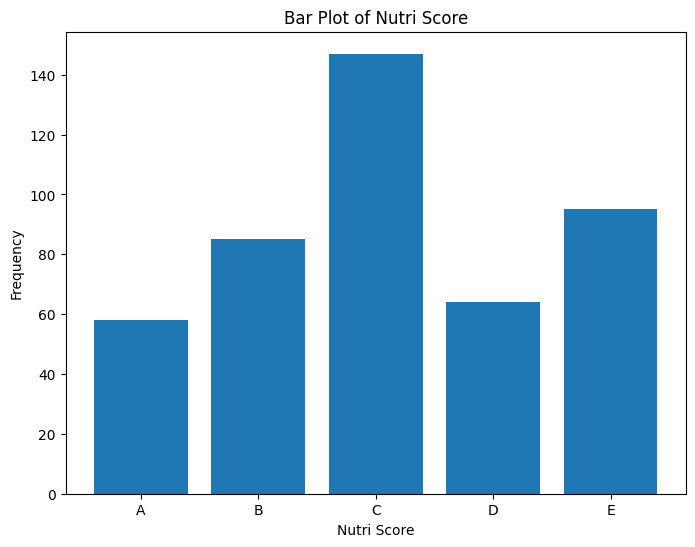

In [ ]:
import matplotlib.pyplot as plt

label = df1['Nutri_Score']

value_counts = label.value_counts()
sorted_index = value_counts.index.sort_values()

# Plot barplot
plt.figure(figsize=(8, 6))
plt.bar(sorted_index, value_counts[sorted_index])
plt.xlabel('Nutri Score')
plt.ylabel('Frequency')
plt.title('Bar Plot of Nutri Score')
plt.show()


# Data Preparation ⚙

## Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Nutri_Score', axis=True)
y = df['Nutri_Score']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Modelling 🎯

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

rf_model = RandomForestClassifier(criterion='gini', random_state=42, max_depth=3)
rf_model.fit(x_train, y_train)

# predict
y_pred_rf = rf_model.predict(x_test)

# accuracy
accuracy = (accuracy_score(y_test, y_pred_rf).round(4))*100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 96.3%


### Max Depth Optimal

In [ ]:

for i in [3,5,7,9]:
    check = RandomForestClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(x_train, y_train)
    y_pred_check= check.predict(x_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 3 = 0.9629629629629629
Akurasi max depth 5 = 0.9629629629629629
Akurasi max depth 7 = 0.9629629629629629
Akurasi max depth 9 = 0.9629629629629629


### Confusion Matrix

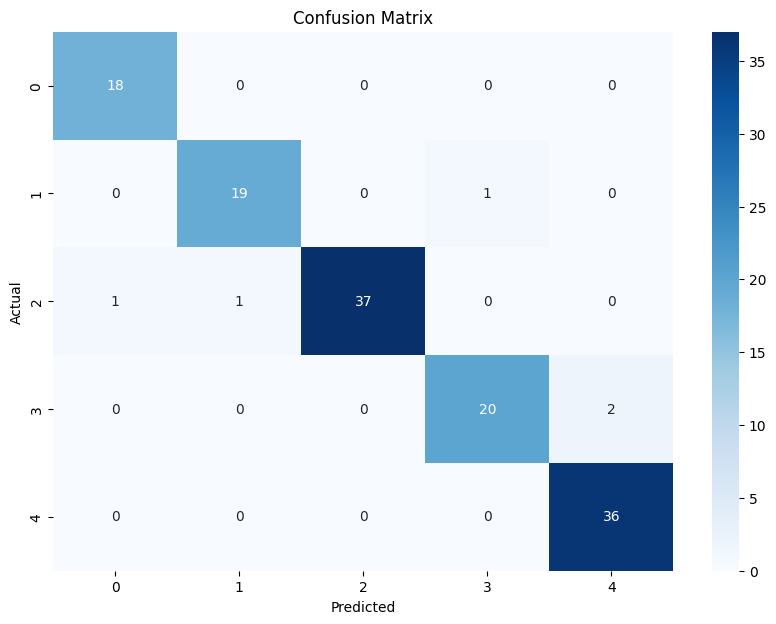

In [ ]:

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Metrics Evalution

In [ ]:

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='macro')
recall = recall_score(y_test, y_pred_rf, average='macro')
f1 = f1_score(y_test, y_pred_rf, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9629629629629629
Precision: 0.9594235588972431
Recall: 0.9615617715617717
F1-Score: 0.9600


### Feature Importance

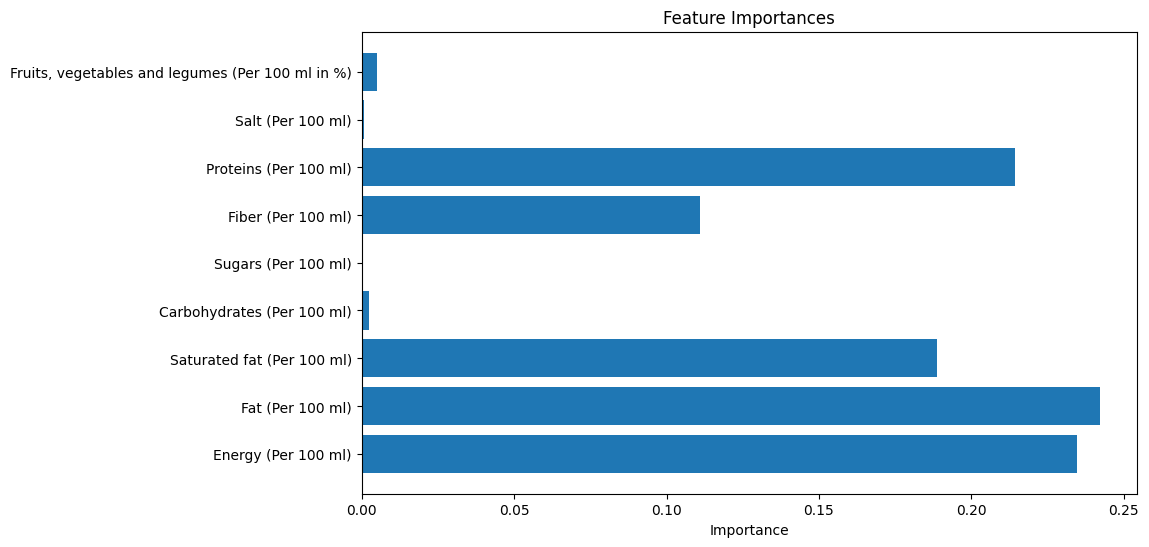

In [ ]:
feature_importances_rf = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances_rf, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42,max_depth=3)
dtc_model.fit(x_train, y_train)

# predict
y_pred_dtc = dtc_model.predict(x_test)

# accuracy
accuracy = (accuracy_score(y_test, y_pred_dtc).round(4))*100
print(f"Akurasi Model: {accuracy}%")

Akurasi Model: 95.56%


### Max Depth Optimal

In [ ]:
# max depth optimal
for i in [3,5,7,9]:
    check = DecisionTreeClassifier(criterion='gini',random_state=42, max_depth=i)
    check.fit(x_train, y_train)
    y_pred_check= check.predict(x_test)
    print(f"Akurasi max depth {i} = {accuracy_score(y_test,y_pred_check)}")

Akurasi max depth 3 = 0.9555555555555556
Akurasi max depth 5 = 0.9555555555555556
Akurasi max depth 7 = 0.9555555555555556
Akurasi max depth 9 = 0.9555555555555556


### Confusion Matrix

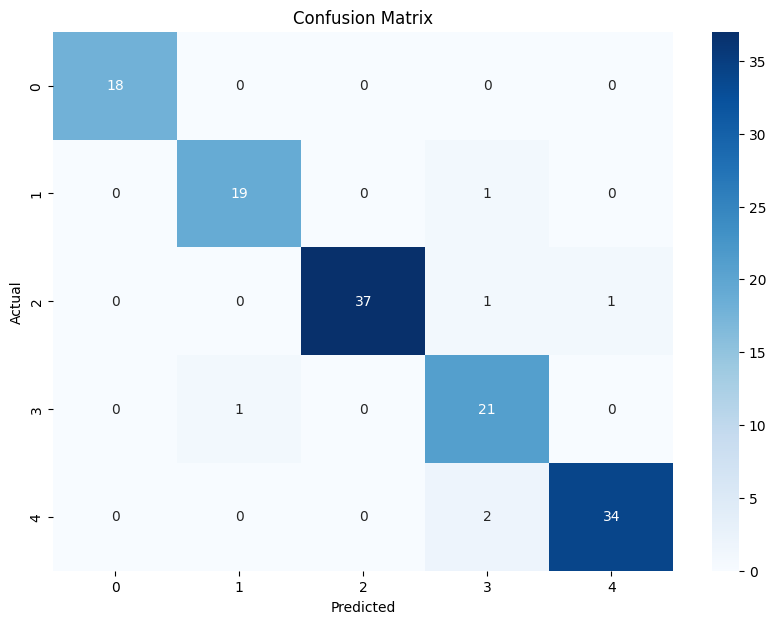

In [ ]:

cm = confusion_matrix(y_test, y_pred_dtc)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Metrics Evalution

In [ ]:

accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc, average='macro')
recall = recall_score(y_test, y_pred_dtc, average='macro')
f1 = f1_score(y_test, y_pred_dtc, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9555555555555556
Precision: 0.9522857142857143
Recall: 0.9595415695415696
F1-Score: 0.9550


### Feature Importance

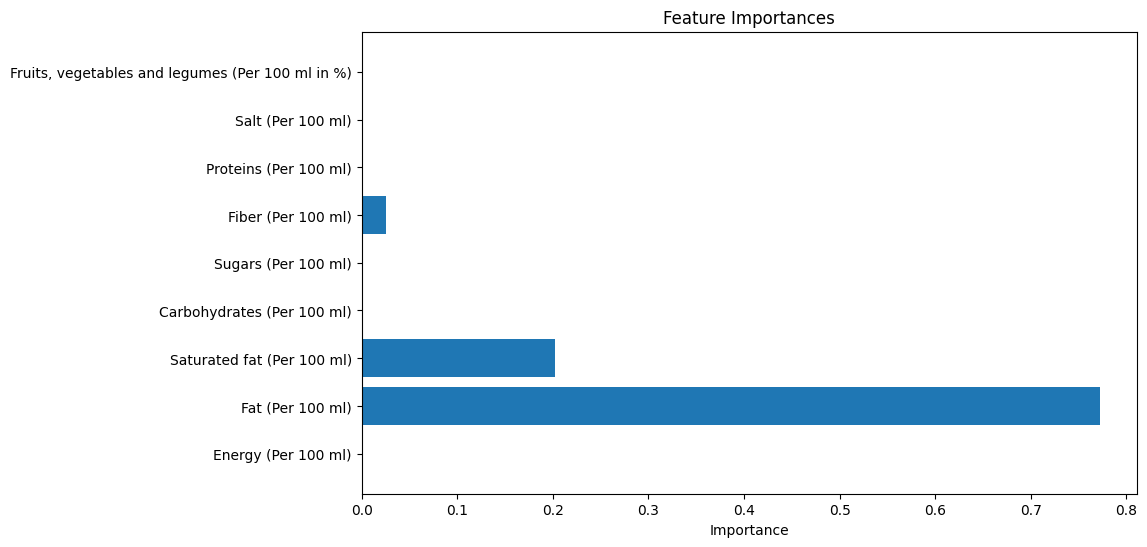

In [ ]:
feature_importances_dt = dtc_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances_dt, align='center')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()